# Building a regression classifier

![title](plot_sdss_filters_11.png)

The astronomical colour (or colour index) is the difference between the magnitudes of two filters, i.e. u - g or i - z.

This index is one way to characterise the colours of galaxies. For example, if the u-g index is high then the object is brighter in ultra violet frequencies than it is in visible green frequencies.

Colour indices act as an approximation for the spectrum of the object and are useful for classifying stars into different types.

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# copy in your get_features_targets function here
def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

# load the data and generate the features and targets
data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)
  
# initialize model
dtr = DecisionTreeRegressor()
# train the model
dtr.fit(features, targets)
# make predictions using the same features
predictions = dtr.predict(features)
# print out the first 4 predicted redshifts
print(predictions[:4])


[0.539301   0.1645703  0.04190006 0.04427702]


In [ ]:
# Can measure the predictive power with many metrics, including the median absolute difference
def median_diff(predicted, actual):
  abs_diff = np.abs(predicted - actual)
  return np.median(abs_diff)

In [3]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))

# write a function that splits the data into training and testing subsets
# trains the model and returns the prediction accuracy with median_diff
def validate_model(model, features, targets):
  # split the data into training and testing
  split = 2*features.shape[0]//3
  train_features, test_features = features[:split], features[split:]
  train_targets, test_targets = targets[:split], targets[split:]

  # train the model
  model.fit(train_features, train_targets)

  # get the predicted_redshifts
  predictions = model.predict(test_features)  
  
  # use median_diff function to calculate the accuracy
  return median_diff(test_targets, predictions)


if __name__ == "__main__":
  data = np.load('sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

  # initialize model
  dtr = DecisionTreeRegressor()

  # validate the model and print the med_diff
  diff = validate_model(dtr, features, targets)
  print('Median difference: {:f}'.format(diff))

Median difference: 0.021540


In [4]:
import numpy as np
from matplotlib import pyplot as plt

# Complete the following to make the plot
if __name__ == "__main__":
    data = np.load('sdss_galaxy_colors_limz.npy')
    # Get a colour map
    cmap = plt.get_cmap('YlOrRd')

    # Define our colour indexes u-g and r-i
    u_g = data['u'] - data['g']
    r_i = data['r'] - data['i']

    # Make a redshift array
    redshift = data['redshift']

    # Create the plot with plt.scatter
    plot = plt.scatter(u_g, r_i, s=0.5, lw=0, c=redshift, cmap=cmap)

    cb = plt.colorbar(plot)
    cb.set_label('Redshift')

    # Define your axis labels and plot title
    plt.xlabel('Colour index  u-g')
    plt.ylabel('Colour index  r-i')
    plt.title('Redshift (colour) u-g versus r-i')

    # Set any axis limits
    plt.xlim(-0.5, 2.5)
    plt.ylim(-0.5, 1)

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'sdss_galaxy_colors_limz.npy'

In [5]:
import numpy as np
for name, value in zip(data.dtype.names, data[0]):
  print('{:10} {:.6}'.format(name, value))

u-g        1.85765
g-r        0.67158
r-i        0.4231
i-z        0.3061
ecc        0.585428
m4_u       2.25195
m4_g       2.33985
m4_r       2.38065
m4_i       2.35974
m4_z       2.39553
petroR50_u 3.09512
petroR50_r 3.81892
petroR50_z 3.82623
petroR90_u 5.17481
petroR90_r 8.26301
petroR90_z 11.4773
class      merger


In [7]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier


# copy your splitdata_train_test function here
def splitdata_train_test(data, fraction_training):
  np.random.seed(0)
  np.random.shuffle(data)  
  split = int(len(data)*fraction_training)
  return data[:split], data[split:]

# copy your generate_features_targets function here
def generate_features_targets(data):
  # complete the function by calculating the concentrations

  targets = data['class']

  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g'] + 1
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ecc']
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']

  # fill the remaining 3 columns with concentrations in the u, r and z filters
  # concentration in u filter
  features[:, 10] = data['petroR50_u']/data['petroR90_u']
  # concentration in r filter
  features[:, 11] = data['petroR50_r']/data['petroR90_r']
  # concentration in z filter
  features[:, 12] = data['petroR50_z']/data['petroR90_z']

  return features, targets


# complete this function by splitting the data set and training a decision tree classifier
def dtc_predict_actual(data):
  # split the data into training and testing sets using a training fraction of 0.7
  train, test = splitdata_train_test(data, 0.7)

  # generate the feature and targets for the training and test sets
  # i.e. train_features, train_targets, test_features, test_targets
  train_features, train_targets = generate_features_targets(train)
  test_features, test_targets = generate_features_targets(test)

  # instantiate a decision tree classifier
  dtc = DecisionTreeClassifier()

  # train the classifier with the train_features and train_targets
  dtc.fit(train_features, train_targets)

  # get predictions for the test_features
  predictions = dtc.predict(test_features)

  # return the predictions and the test_targets
  return predictions, test_targets


if __name__ == '__main__':
  data = np.load('galaxy_catalogue.npy')
    
  predicted_class, actual_class = dtc_predict_actual(data)

  # Print some of the initial results
  print("Some initial results...\n   predicted,  actual")
  for i in range(10):
    print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))
 

Some initial results...
   predicted,  actual
0. merger, merger
1. merger, merger
2. elliptical, elliptical
3. elliptical, elliptical
4. spiral, spiral
5. merger, spiral
6. merger, spiral
7. merger, spiral
8. merger, merger
9. merger, merger


# Decision tree classification

Our accuracy score: 0.7858974358974359
Confusion matrix, without normalization
[[232   5  23]
 [  5 197  58]
 [ 25  51 184]]


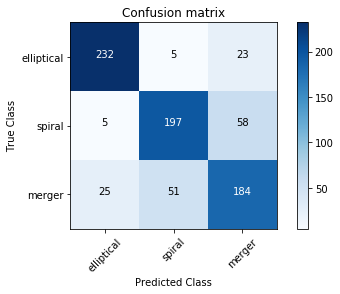

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import itertools
from matplotlib import pyplot as plt



def generate_features_targets(data):
    output_targets = np.empty(shape=(len(data)), dtype='<U20')
    output_targets[:] = data['class']

    input_features = np.empty(shape=(len(data), 13))
    input_features[:, 0] = data['u-g']
    input_features[:, 1] = data['g-r']
    input_features[:, 2] = data['r-i']
    input_features[:, 3] = data['i-z']
    input_features[:, 4] = data['ecc']
    input_features[:, 5] = data['m4_u']
    input_features[:, 6] = data['m4_g']
    input_features[:, 7] = data['m4_r']
    input_features[:, 8] = data['m4_i']
    input_features[:, 9] = data['m4_z']
    input_features[:, 10] = data['petroR50_u'] / data['petroR90_u']
    input_features[:, 11] = data['petroR50_r'] / data['petroR90_r']
    input_features[:, 12] = data['petroR50_z'] / data['petroR90_z']

    return input_features, output_targets



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')


# Implement the following function
def calculate_accuracy(predicted_classes, actual_classes):
  return sum(predicted_classes == actual_classes)/len(actual_classes)


if __name__ == "__main__":
  data = np.load('galaxy_catalogue.npy')

  # split the data
  features, targets = generate_features_targets(data)

  # train the model to get predicted and actual classes
  dtc = DecisionTreeClassifier()
  predicted = cross_val_predict(dtc, features, targets, cv=10)

  # calculate the model score using your function
  model_score = calculate_accuracy(predicted, targets)
  print("Our accuracy score:", model_score)

  # calculate the models confusion matrix using sklearns confusion_matrix function
  class_labels = list(set(targets))
  model_cm = confusion_matrix(y_true=targets, y_pred=predicted, labels=class_labels)

  # Plot the confusion matrix using the provided functions.
  plt.figure()
  plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
  plt.show()

# Random forest classification


Accuracy score: 0.8615384615384616
Confusion matrix, without normalization
[[244   2  14]
 [  4 219  37]
 [ 16  35 209]]


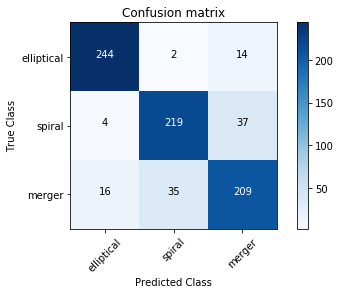

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier


# complete this function to get predictions from a random forest classifier
def rf_predict_actual(data, n_estimators):
  # generate the features and targets
  features, targets = generate_features_targets(data)

  # instantiate a random forest classifier
  rfc = RandomForestClassifier(n_estimators=n_estimators)
  
  # get predictions using 10-fold cross validation with cross_val_predict
  predicted = cross_val_predict(rfc, features, targets, cv=10)

  # return the predictions and their actual classes
  return predicted, targets

if __name__ == "__main__":
  data = np.load('galaxy_catalogue.npy')

  # get the predicted and actual classes
  number_estimators = 50              # Number of trees
  predicted, actual = rf_predict_actual(data, number_estimators)

  # calculate the model score using your function
  accuracy = calculate_accuracy(predicted, actual)
  print("Accuracy score:", accuracy)

  # calculate the models confusion matrix using sklearns confusion_matrix function
  class_labels = list(set(actual))
  model_cm = confusion_matrix(y_true=actual, y_pred=predicted, labels=class_labels)

  # plot the confusion matrix using the provided functions.
  plt.figure()
  plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
  plt.show()